## 1. PaddleOCR -> generate result

In [56]:
# test.jpg
# infer.txt

import subprocess

# 명령 실행 및 결과 출력
command = [
    "python3",
    "ppstructure/kie/predict_kie_token_ser.py",
    "--kie_algorithm=LayoutXLM",
    "--ser_model_dir=inference/inference_best_model",
    "--use_visual_backbone=False",
    "--image_dir=./ppstructure/docs/kie/input/test.jpg",
    "--ser_dict_path=train_data/XFUND/class_list_xfun.txt",
    "--vis_font_path=doc/fonts/simfang.ttf",
    "--ocr_order_method=tb-yx"
]

# subprocess 모듈을 사용하여 명령 실행
result = subprocess.run(command, capture_output=True, text=True)

# 출력 내용을 txt 파일로 저장
output_file_path = "./output/confidence.txt"
with open(output_file_path, "w") as output_file:
    output_file.write(result.stdout)

print(f"Output saved to {output_file_path}")


Output saved to ./output/confidence.txt


In [57]:
#!python3 tools/infer_kie_token_ser.py -c configs/kie/vi_layoutxlm/ser_vi_layoutxlm_xfund_zh.yml -o Architecture.Backbone.checkpoints=./output/ser_vi_layoutxlm_xfund_zh/best_accuracy Global.infer_img=./ppstructure/docs/kie/input/test.jpg

## 2. Preprocessing -> generate bounding, string, confidence

In [58]:
# Generate bounding.txt
import re

# 입력 파일 경로와 출력 파일 경로를 설정합니다.
input_file_path = './output/infer.txt'  # 원본 파일 경로
output_file_path = './output/bounding.txt'  # 결과 파일 경로

# 정규 표현식을 사용하여 "points": [[582.0, 1583.0], [683.0, 1583.0], [683.0, 1602.0], [582.0, 1602.0]] 패턴을 찾습니다.
pattern = re.compile(r'"points": \[\[(.*?)\]\]')

# 입력 파일을 읽어서 패턴에 맞는 부분을 찾아 리스트로 저장합니다.
with open(input_file_path, 'r', encoding='utf-8') as input_file:
    matches = re.findall(pattern, input_file.read())

# 출력 파일을 쓰기 모드로 엽니다.
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # 각 매치를 출력 파일에 씁니다.
    for i, match in enumerate(matches):
        output_file.write(f'[{match}]')
        # 마지막 개체가 아닌 경우에만 개행 문자를 추가합니다.
        if i < len(matches) - 1:
            output_file.write('\n')


In [59]:
# Generate coord list using bounding.txt
import re

# 파일 경로
file_path = './output/bounding.txt'

# 파일을 읽어서 문자열로 저장
with open(file_path, 'r') as file:
    file_content = file.read()

# 정규 표현식을 사용하여 좌표 추출
pattern = r'\[([\d.]+),\s*([\d.]+)\]'
coordinates = re.findall(pattern, file_content)

# 문자열을 실수형으로 변환하고 리스트로 저장
coordinates_list = [[float(x), float(y)] for x, y in coordinates]

# 좌표를 8개씩 묶기
coord = [coordinates_list[i:i + 4] for i in range(0, len(coordinates_list), 4)]
print(coord)

[[[364.0, 100.0], [904.0, 100.0], [904.0, 122.0], [364.0, 122.0]], [[362.0, 131.0], [1088.0, 131.0], [1088.0, 153.0], [362.0, 153.0]], [[889.0, 180.0], [1060.0, 182.0], [1060.0, 206.0], [889.0, 204.0]], [[161.0, 223.0], [480.0, 223.0], [480.0, 246.0], [161.0, 246.0]], [[889.0, 223.0], [1034.0, 223.0], [1034.0, 246.0], [889.0, 246.0]], [[890.0, 205.0], [1060.0, 205.0], [1060.0, 227.0], [890.0, 227.0]], [[161.0, 254.0], [497.0, 254.0], [497.0, 278.0], [161.0, 278.0]], [[889.0, 254.0], [1027.0, 254.0], [1027.0, 278.0], [889.0, 278.0]], [[163.0, 277.0], [326.0, 277.0], [326.0, 301.0], [163.0, 301.0]], [[889.0, 277.0], [1032.0, 277.0], [1032.0, 299.0], [889.0, 299.0]], [[163.0, 297.0], [601.0, 297.0], [601.0, 320.0], [163.0, 320.0]], [[163.0, 337.0], [386.0, 337.0], [386.0, 361.0], [163.0, 361.0]], [[159.0, 359.0], [398.0, 357.0], [399.0, 382.0], [159.0, 383.0]], [[159.0, 382.0], [423.0, 380.0], [423.0, 404.0], [159.0, 406.0]], [[161.0, 404.0], [601.0, 404.0], [601.0, 428.0], [161.0, 428.0]

In [60]:
print(coord[0])

[[364.0, 100.0], [904.0, 100.0], [904.0, 122.0], [364.0, 122.0]]


In [61]:
# Generate string.txt
import re

# 입력 파일 경로와 출력 파일 경로를 설정합니다.
input_file_path = './output/infer.txt'  # 원본 파일 경로
output_file_path = './output/string.txt'  # 결과 파일 경로

# 정규 표현식을 사용
pattern = re.compile(r'"transcription": "(.*?)"')

# 입력 파일을 읽어서 패턴에 맞는 부분을 찾아 리스트로 저장합니다.
with open(input_file_path, 'r', encoding='utf-8') as input_file:
    matches = re.findall(pattern, input_file.read())

# 출력 파일을 쓰기 모드로 엽니다.
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # 각 매치를 출력 파일에 씁니다.
    for i, match in enumerate(matches):
        output_file.write(f'[{match}]')
        # 마지막 개체가 아닌 경우에만 개행 문자를 추가합니다.
        if i < len(matches) - 1:
            output_file.write('\n')

In [62]:
# Generate str list using string.txt

In [63]:
# 파일 경로
file_path = './output/string.txt'

# 파일을 읽어서 문자열로 저장
with open(file_path, 'r') as file:
    file_content = file.read()

# 정규 표현식을 사용하여 각 줄의 내용 추출
pattern = r'\[([^\]]+)\]'
str = re.findall(pattern, file_content)
print(str)

['MANWAHGLOBAL(MACAO)LIMITED', "ALAMEDADR.CARLOS D'ASSUMPCAONO.411-417,PRACA WONG CHIOJ&K19,MACAU", 'Delivery Receipt', 'Tel :+853 2875-3152 Fax :+853 2875-3291', 'PI No.:1001437576', 'Invoice No.:910759532', "Name :BOB'S DISCOUNT FURNITURE,LLC", 'Date :24-OCT-2022', "Ship to :Bob's discount", 'PO No.:4501022058', '6227 CAJON BOULEVARD SANBERNARDINO.CA 92407', 'Shipped Per :AMALIA C 119A', 'Loaded On Board :24-OCT-2022', 'Estimate Arrive Date :26-NOV-2022', 'Shipped From HO CHI MINH TO San Beimardino,CA 92407', 'MARKS', 'MODEL-DESC/SKU/CUSTOMER PO#', 'DESCRIPTION', "Q'TY(PCS)", 'G.W.(KGS)', 'Fabric SOFA', 'D1.5 (H)(8\\', 'BX5781HM-', '(H)/35532-2/35526-2', 'ARMLESSCHAIR8\\', '9', '261', 'BX5781HM-TL-', 'LAF push back Chaise(bigger)', 'PEH(8\\', 'W/PHR/35532-2/35526-2', '6', '346.8', 'BX5781HM-TR-', 'RAF push back Chaise(bigger)', 'PEH(8\\', 'W/PHR/35532-2/35526-2', '346.8', 'BX5781HM-HCE-', 'STRAIGHT CONSOLEW/USB', 'KD(H)/20049145004', '(H)/35532-2/35526-2', '22', '418', 'BX5781HM-D1.5

In [64]:
print(str[0])

MANWAHGLOBAL(MACAO)LIMITED


In [65]:
# Generate confidence.txt

In [66]:
import re

# 입력 파일 경로와 출력 파일 경로를 설정합니다.
input_file_path = './output/confidence.txt'  # 원본 파일 경로
output_file_path = './output/confidence2.txt'  # 결과 파일 경로

# 정규 표현식을 사용
pattern = re.compile(r'0\.\d+')

# 0.으로 시작하는 줄만 필터링하여 리스트로 저장
filtered_lines = []
with open(input_file_path, 'r', encoding='utf-8') as input_file:
    for line in input_file:
        if line.startswith('0.'):
            filtered_lines.append(f'[{line.strip()}]')

# 출력 파일을 쓰기 모드로 엽니다.
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # 필터링된 라인들을 출력 파일에 씁니다.
    output_file.write('\n'.join(filtered_lines))

In [67]:
# 파일 경로
file_path = './output/confidence2.txt'

# 파일을 읽어서 문자열로 저장
with open(file_path, 'r') as file:
    file_content = file.read()

# 정규 표현식을 사용하여 각 줄의 내용 추출
pattern = r'\[([^\]]+)\]'
conf = re.findall(pattern, file_content)
print(conf)

['0.38856295', '0.9989262', '0.98884434', '0.9998269', '0.0', '0.9994887', '0.999493', '0.999334', '0.9994736', '0.9998165', '0.99974483', '0.99982363', '0.99982065', '0.9999342', '0.9997875', '0.9999086', '0.99986523', '0.9988746', '0.9878999', '0.9998746', '0.9649708', '0.997157', '0.9986231', '0.99744767', '0.9902946', '0.94714546', '0.9950432', '0.9875596', '0.9987522', '0.9689725', '0.99526536', '0.9953133', '0.9137158', '0.9542681', '0.99842775', '0.998976', '0.96292967', '0.9983206', '0.93788505', '0.998591', '0.9905424', '0.99700654', '0.999484', '0.9698924', '0.99605924', '0.9762454', '0.96403515', '0.96378106', '0.9772428', '0.9862901', '0.9990566', '0.96273834', '0.998838', '0.98530185', '0.99405396', '0.9559554', '0.99735916', '0.98893404', '0.9438425', '0.9677419', '0.9704666', '0.9965212', '0.9851732', '0.9931125', '0.9789857', '0.9510334', '0.9803697', '0.9750269', '0.97816235', '0.9976226', '0.96192276', '0.9932044', '0.9921461', '0.99386686', '0.9666992', '0.9984308', 

## 3. HeatMap using bounding, confidence

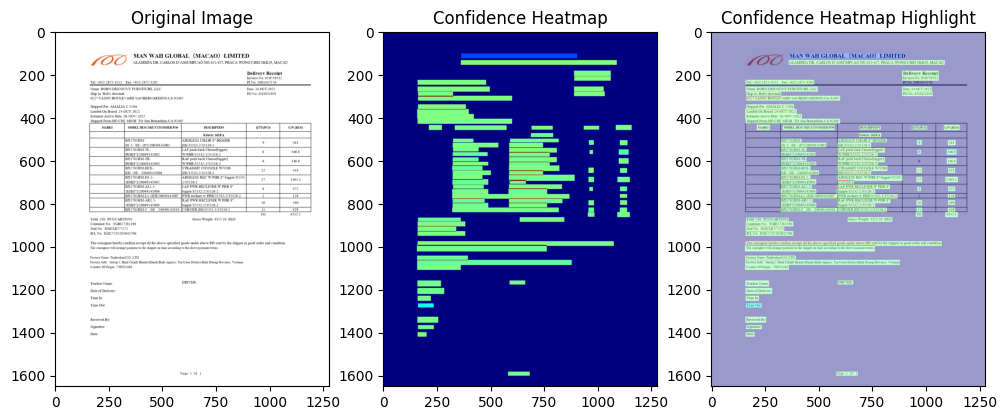

In [68]:
# heatmap

import cv2
import numpy as np
import matplotlib.pyplot as plt


# 이미지 불러오기
image_path = './ppstructure/docs/kie/input/test.jpg'
img = cv2.imread(image_path)

confidences = conf
boxes = coord

# Grad-CAM Heatmap 생성
heatmap = np.zeros_like(img[:, :, 0], dtype=np.float32)
for box, confidence in zip(boxes, confidences):
        # 좌표 값을 정수로 변환
    x1, y1 = map(int, box[0])
    x2, y2 = map(int, box[2])
    confidence = float(confidence)
    heatmap[y1:y2, x1:x2] += confidence

# Normalize heatmap values to [0, 1]
heatmap_normalized = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)

# Apply colormap for better visualization
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_normalized), cv2.COLORMAP_JET)

# Superimpose heatmap on the original image
superimposed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img[:, :, ::-1])
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(heatmap_colored[:, :, ::-1])
plt.title('Confidence Heatmap')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img[:, :, ::-1])
plt.title('Confidence Heatmap Highlight')
plt.show()

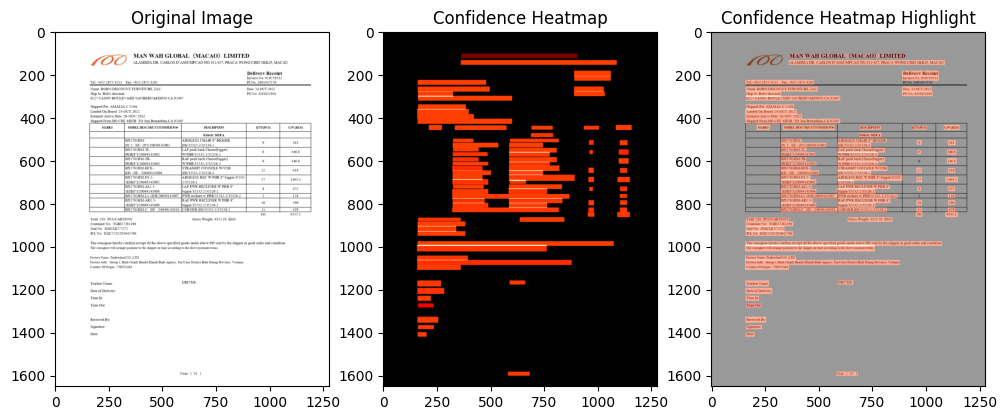

In [69]:
# heatmap

import cv2
import numpy as np
import matplotlib.pyplot as plt


# 이미지 불러오기
image_path = './ppstructure/docs/kie/input/test.jpg'
img = cv2.imread(image_path)

confidences = conf
boxes = coord

# Grad-CAM Heatmap 생성
heatmap = np.zeros_like(img[:, :, 0], dtype=np.float32)
for box, confidence in zip(boxes, confidences):
        # 좌표 값을 정수로 변환
    x1, y1 = map(int, box[0])
    x2, y2 = map(int, box[2])
    confidence = float(confidence)
    heatmap[y1:y2, x1:x2] += confidence

# Normalize heatmap values to [0, 1]
heatmap_normalized = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)

# Apply colormap for better visualization
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_normalized), cv2.COLORMAP_HOT)

# Superimpose heatmap on the original image
superimposed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img[:, :, ::-1])
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(heatmap_colored[:, :, ::-1])
plt.title('Confidence Heatmap')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img[:, :, ::-1])
plt.title('Confidence Heatmap Highlight')
plt.show()

## 4. RISE (Randomized Input Sampling for Explanation)

### example 1

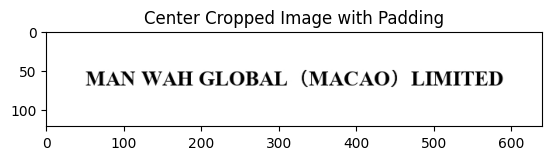

True

In [70]:
# bounding1.jpg 생성

confidences = conf
boxes = coord

# 특정 bounding box 선택 (예: 첫 번째 bounding box)
selected_box_index = 0
selected_box = coord[selected_box_index]

# bounding box 좌표 추출
x1, y1 = map(int, selected_box[0])
x2, y2 = map(int, selected_box[2])

# 이미지 크기 설정
height, width, _ = img.shape

# 흰 바탕화면 생성
white_background = np.ones((height, width, 3), dtype=np.uint8) * 255

# 특정 bounding box에 해당하는 이미지 추출
highlighted_box = img[max(y1, 0):min(y2, height), max(x1, 0):min(x2, width), :]

# 추출한 이미지를 흰 바탕화면 가운데에 삽입
offset_x = (width - (x2 - x1)) // 2
offset_y = (height - (y2 - y1)) // 2
white_background[offset_y:offset_y + (y2 - y1), offset_x:offset_x + (x2 - x1), :] = highlighted_box

# 추출한 이미지에서 가운데 부분만 가져오기
center_cropped = white_background[offset_y:offset_y + (y2 - y1), offset_x:offset_x + (x2 - x1), :]

# 여백 추가
padding = 50
center_cropped_with_padding = np.ones((center_cropped.shape[0] + 2 * padding, center_cropped.shape[1] + 2 * padding, 3), dtype=np.uint8) * 255
center_cropped_with_padding[padding:padding + center_cropped.shape[0], padding:padding + center_cropped.shape[1], :] = center_cropped

# 결과 이미지 출력
plt.imshow(center_cropped_with_padding[:, :, ::-1])
plt.title('Center Cropped Image with Padding')
plt.show()

# 결과 이미지 저장
cv2.imwrite('./output/RISE/bounding1.jpg', center_cropped_with_padding)

In [71]:
# coordinate 계산 함수
def cal_coord(image):
    
    # 명령 실행 및 결과 출력
    command = [
        "python3",
        "ppstructure/kie/predict_kie_token_ser.py",
        "--kie_algorithm=LayoutXLM",
        "--ser_model_dir=inference/inference_best_model",
        "--use_visual_backbone=False",
        "--image_dir=./output/RISE/"+image,
        "--ser_dict_path=train_data/XFUND/class_list_xfun.txt",
        "--vis_font_path=doc/fonts/simfang.ttf",
        "--ocr_order_method=tb-yx"
    ]

    # subprocess 모듈을 사용하여 명령 실행
    result = subprocess.run(command, capture_output=True, text=True)
    
    # 입력 파일 경로와 출력 파일 경로를 설정합니다.
    input_file_path = './output/infer.txt'  # 원본 파일 경로
    output_file_path = './output/coord_bound.txt'  # 결과 파일 경로

    # 정규 표현식을 사용하여 "points": [[582.0, 1583.0], [683.0, 1583.0], [683.0, 1602.0], [582.0, 1602.0]] 패턴을 찾습니다.
    pattern = re.compile(r'"points": \[\[(.*?)\]\]')

    # 입력 파일을 읽어서 패턴에 맞는 부분을 찾아 리스트로 저장합니다.
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        matches = re.findall(pattern, input_file.read())

    # 출력 파일을 쓰기 모드로 엽니다.
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        # 각 매치를 출력 파일에 씁니다.
        for i, match in enumerate(matches):
            output_file.write(f'[{match}]')
            # 마지막 개체가 아닌 경우에만 개행 문자를 추가합니다.
            if i < len(matches) - 1:
                output_file.write('\n') 
                

    # 파일 경로
    file_path = './output/coord_bound.txt'

    # 파일을 읽어서 문자열로 저장
    with open(file_path, 'r') as file:
        file_content = file.read()

    # 정규 표현식을 사용하여 좌표 추출
    pattern = r'\[([\d.]+),\s*([\d.]+)\]'
    coordinates = re.findall(pattern, file_content)

    # 문자열을 실수형으로 변환하고 리스트로 저장
    coordinates_list = [[float(x), float(y)] for x, y in coordinates]

    # 좌표를 8개씩 묶기
    coord = [coordinates_list[i:i + 4] for i in range(0, len(coordinates_list), 4)]
    return coord


In [72]:
# confidence 계산 함수
def cal_conf(image):
    # 명령 실행 및 결과 출력
    command = [
        "python3",
        "ppstructure/kie/predict_kie_token_ser.py",
        "--kie_algorithm=LayoutXLM",
        "--ser_model_dir=inference/inference_best_model",
        "--use_visual_backbone=False",
        "--image_dir=./output/"+image,
        "--ser_dict_path=train_data/XFUND/class_list_xfun.txt",
        "--vis_font_path=doc/fonts/simfang.ttf",
        "--ocr_order_method=tb-yx"
    ]

    # subprocess 모듈을 사용하여 명령 실행
    result = subprocess.run(command, capture_output=True, text=True)

    # 출력 내용을 txt 파일로 저장
    output_file_path = "./output/conf_bound.txt"
    with open(output_file_path, "w") as output_file:
            output_file.write(result.stdout)
            
    # 입력 파일 경로와 출력 파일 경로를 설정합니다.
    input_file_path = './output/conf_bound.txt'  # 원본 파일 경로
    output_file_path = './output/conf_bound2.txt'  # 결과 파일 경로

    # 정규 표현식을 사용
    pattern = re.compile(r'0\.\d+')

    # 0.으로 시작하는 줄만 필터링하여 리스트로 저장
    filtered_lines = []
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        for line in input_file:
            if line.startswith('0.'):
                filtered_lines.append(f'[{line.strip()}]')

    # 출력 파일을 쓰기 모드로 엽니다.
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        # 필터링된 라인들을 출력 파일에 씁니다.
        output_file.write('\n'.join(filtered_lines))
    
    # 파일 경로
    file_path = './output/conf_bound2.txt'

    # 파일을 읽어서 문자열로 저장
    with open(file_path, 'r') as file:
        file_content = file.read()

    # 정규 표현식을 사용하여 각 줄의 내용 추출
    pattern = r'\[([^\]]+)\]'
    conf = re.findall(pattern, file_content)
    
    return conf

0.97286415
0.96161824
0.9628388
0.9581568
0.95952
0.9654933
0.9363413
0.9712614
0.97504264
0.9733229
0.9643746
0.9409465
0.9617415
0.9629276
0.9740609
0.94531405
0.9817095
0.9485577
0.97526497
0.9733744
0.9760872
0.968112


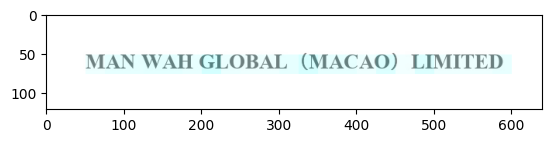

In [73]:
# 이미지 불러오기
image_path = 'bounding1.jpg'
jpg = cv2.imread("./output/RISE/"+image_path)

# 원래 image로부터 coordinate값 계산
coord = cal_coord(image_path)[0]

# 원래 image로부터 confidence 값을 계산합니다.
conf = cal_conf("RISE/"+image_path)[0]

# Convert coordinates to integers
coord = [(int(coor[0]), int(coor[1])) for coor in coord]

# In your apply_sequential_mask function
def apply_sequential_mask(image, window_size, coords):
    h, w, _ = image.shape

    # heatmap 기본값. 기본 이미지에 대한 conf score * 255. score 높으면 밝게
    heatmap_values = np.full_like(image, 255, dtype=np.uint8)

    # 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑기
    visited_pixels = set()
    for x in range(coords[0][1], coords[2][1], window_size):
        for y in range(coords[0][0], coords[2][0], window_size):
            # Extract n*n region without overlap
            selected_pixels = [(i, j) for i in range(x, min(x + window_size, h)) for j in range(y, min(y + window_size, w))]
            # Filter out already selected pixels
            selected_pixels = list(set(selected_pixels) - visited_pixels)

            if not selected_pixels:
                # Break if no more pixels to select
                break

            mask = np.zeros((h, w), dtype=bool)
            masked_image = image.copy()

            # 무작위로 선택된 픽셀에 마스크 적용
            for i, j in selected_pixels:
                mask[i, j] = True
                masked_image[i, j] = 255  # 마스크가 적용된 위치를 흰색으로 설정
            cv2.imwrite('./output/masked_image.jpg', masked_image)

            # 마스크가 적용된 이미지에서 confidence 값을 계산
            conf = cal_conf("masked_image.jpg")[0]

            if result == [None]:
                masked_confidence = 0
            else:
                masked_confidence = conf

            for i, j in selected_pixels:
                masked_confidence = float(masked_confidence)
                heatmap_values[i, j] = int(masked_confidence * 255)
            print(masked_confidence)

            # Update visited pixels
            visited_pixels.update(selected_pixels)

    # Convert heatmap_values to grayscale
    heatmap_gray = cv2.cvtColor(heatmap_values, cv2.COLOR_BGR2GRAY)

    # Create a colormap for the heatmap
    colormap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)

    # Adjust transparency of the heatmap (you can adjust the alpha value)
    alpha = 0.5
    heatmap_with_alpha = cv2.addWeighted(jpg, 1 - alpha, colormap, alpha, 0)

    # Display the result
    plt.imshow(heatmap_with_alpha)
    plt.show()

# 3) 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑음
apply_sequential_mask(jpg, window_size=25, coords=coord)


0.97286415
0.96161824
0.9628388
0.9581568
0.95952
0.9654933
0.9363413
0.9712614
0.97504264
0.9733229
0.9643746
0.9409465
0.9617415
0.9629276
0.9740609
0.94531405
0.9817095
0.9485577
0.97526497
0.9733744
0.9760872
0.968112


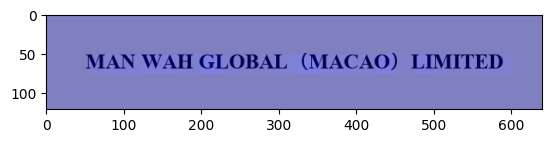

In [74]:
# 이미지 불러오기
image_path = 'bounding1.jpg'
jpg = cv2.imread("./output/RISE/"+image_path)

# 원래 image로부터 coordinate값 계산
coord = cal_coord(image_path)[0]

# 원래 image로부터 confidence 값을 계산합니다.
conf = cal_conf("RISE/"+image_path)[0]

# Convert coordinates to integers
coord = [(int(coor[0]), int(coor[1])) for coor in coord]

# In your apply_sequential_mask function
def apply_sequential_mask(image, window_size, coords):
    h, w, _ = image.shape

    # heatmap 기본값. 기본 이미지에 대한 conf score * 255. score 높으면 밝게
    heatmap_values = np.full_like(image, 255, dtype=np.uint8)

    # 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑기
    visited_pixels = set()
    for x in range(coords[0][1], coords[2][1], window_size):
        for y in range(coords[0][0], coords[2][0], window_size):
            # Extract n*n region without overlap
            selected_pixels = [(i, j) for i in range(x, min(x + window_size, h)) for j in range(y, min(y + window_size, w))]
            # Filter out already selected pixels
            selected_pixels = list(set(selected_pixels) - visited_pixels)

            if not selected_pixels:
                # Break if no more pixels to select
                break

            mask = np.zeros((h, w), dtype=bool)
            masked_image = image.copy()

            # 무작위로 선택된 픽셀에 마스크 적용
            for i, j in selected_pixels:
                mask[i, j] = True
                masked_image[i, j] = 255  # 마스크가 적용된 위치를 흰색으로 설정
            cv2.imwrite('./output/masked_image.jpg', masked_image)

            # 마스크가 적용된 이미지에서 confidence 값을 계산
            conf = cal_conf("masked_image.jpg")[0]

            if result == [None]:
                masked_confidence = 0
            else:
                masked_confidence = conf

            for i, j in selected_pixels:
                masked_confidence = float(masked_confidence)
                heatmap_values[i, j] = int(masked_confidence * 255)
            print(masked_confidence)

            # Update visited pixels
            visited_pixels.update(selected_pixels)

    # Convert heatmap_values to grayscale
    heatmap_gray = cv2.cvtColor(heatmap_values, cv2.COLOR_BGR2GRAY)

    # Create a colormap for the heatmap
    colormap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_JET)

    # Adjust transparency of the heatmap (you can adjust the alpha value)
    alpha = 0.5
    heatmap_with_alpha = cv2.addWeighted(jpg, 1 - alpha, colormap, alpha, 0)

    # Display the result
    plt.imshow(heatmap_with_alpha)
    plt.show()

# 3) 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑음
apply_sequential_mask(jpg, window_size=25, coords=coord)


### example 2

In [75]:
# 초기 코드 재실행 과정 ------------------------------------

In [76]:
# test.jpg
# infer.txt

import subprocess

# 명령 실행 및 결과 출력
command = [
    "python3",
    "ppstructure/kie/predict_kie_token_ser.py",
    "--kie_algorithm=LayoutXLM",
    "--ser_model_dir=inference/inference_best_model",
    "--use_visual_backbone=False",
    "--image_dir=./ppstructure/docs/kie/input/test.jpg",
    "--ser_dict_path=train_data/XFUND/class_list_xfun.txt",
    "--vis_font_path=doc/fonts/simfang.ttf",
    "--ocr_order_method=tb-yx"
]

# subprocess 모듈을 사용하여 명령 실행
result = subprocess.run(command, capture_output=True, text=True)

# 출력 내용을 txt 파일로 저장
output_file_path = "./output/confidence.txt"
with open(output_file_path, "w") as output_file:
    output_file.write(result.stdout)

print(f"Output saved to {output_file_path}")


Output saved to ./output/confidence.txt


In [77]:
# Generate bounding.txt
import re

# 입력 파일 경로와 출력 파일 경로를 설정합니다.
input_file_path = './output/infer.txt'  # 원본 파일 경로
output_file_path = './output/bounding.txt'  # 결과 파일 경로

# 정규 표현식을 사용하여 "points": [[582.0, 1583.0], [683.0, 1583.0], [683.0, 1602.0], [582.0, 1602.0]] 패턴을 찾습니다.
pattern = re.compile(r'"points": \[\[(.*?)\]\]')

# 입력 파일을 읽어서 패턴에 맞는 부분을 찾아 리스트로 저장합니다.
with open(input_file_path, 'r', encoding='utf-8') as input_file:
    matches = re.findall(pattern, input_file.read())

# 출력 파일을 쓰기 모드로 엽니다.
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # 각 매치를 출력 파일에 씁니다.
    for i, match in enumerate(matches):
        output_file.write(f'[{match}]')
        # 마지막 개체가 아닌 경우에만 개행 문자를 추가합니다.
        if i < len(matches) - 1:
            output_file.write('\n')


In [78]:
# Generate coord list using bounding.txt
import re

# 파일 경로
file_path = './output/bounding.txt'

# 파일을 읽어서 문자열로 저장
with open(file_path, 'r') as file:
    file_content = file.read()

# 정규 표현식을 사용하여 좌표 추출
pattern = r'\[([\d.]+),\s*([\d.]+)\]'
coordinates = re.findall(pattern, file_content)

# 문자열을 실수형으로 변환하고 리스트로 저장
coordinates_list = [[float(x), float(y)] for x, y in coordinates]

# 좌표를 8개씩 묶기
coord = [coordinates_list[i:i + 4] for i in range(0, len(coordinates_list), 4)]
print(coord)

[[[364.0, 100.0], [904.0, 100.0], [904.0, 122.0], [364.0, 122.0]], [[362.0, 131.0], [1088.0, 131.0], [1088.0, 153.0], [362.0, 153.0]], [[889.0, 180.0], [1060.0, 182.0], [1060.0, 206.0], [889.0, 204.0]], [[161.0, 223.0], [480.0, 223.0], [480.0, 246.0], [161.0, 246.0]], [[889.0, 223.0], [1034.0, 223.0], [1034.0, 246.0], [889.0, 246.0]], [[890.0, 205.0], [1060.0, 205.0], [1060.0, 227.0], [890.0, 227.0]], [[161.0, 254.0], [497.0, 254.0], [497.0, 278.0], [161.0, 278.0]], [[889.0, 254.0], [1027.0, 254.0], [1027.0, 278.0], [889.0, 278.0]], [[163.0, 277.0], [326.0, 277.0], [326.0, 301.0], [163.0, 301.0]], [[889.0, 277.0], [1032.0, 277.0], [1032.0, 299.0], [889.0, 299.0]], [[163.0, 297.0], [601.0, 297.0], [601.0, 320.0], [163.0, 320.0]], [[163.0, 337.0], [386.0, 337.0], [386.0, 361.0], [163.0, 361.0]], [[159.0, 359.0], [398.0, 357.0], [399.0, 382.0], [159.0, 383.0]], [[159.0, 382.0], [423.0, 380.0], [423.0, 404.0], [159.0, 406.0]], [[161.0, 404.0], [601.0, 404.0], [601.0, 428.0], [161.0, 428.0]

In [79]:
# Generate string.txt
import re

# 입력 파일 경로와 출력 파일 경로를 설정합니다.
input_file_path = './output/infer.txt'  # 원본 파일 경로
output_file_path = './output/string.txt'  # 결과 파일 경로

# 정규 표현식을 사용
pattern = re.compile(r'"transcription": "(.*?)"')

# 입력 파일을 읽어서 패턴에 맞는 부분을 찾아 리스트로 저장합니다.
with open(input_file_path, 'r', encoding='utf-8') as input_file:
    matches = re.findall(pattern, input_file.read())

# 출력 파일을 쓰기 모드로 엽니다.
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # 각 매치를 출력 파일에 씁니다.
    for i, match in enumerate(matches):
        output_file.write(f'[{match}]')
        # 마지막 개체가 아닌 경우에만 개행 문자를 추가합니다.
        if i < len(matches) - 1:
            output_file.write('\n')

In [80]:
# 파일 경로
file_path = './output/string.txt'

# 파일을 읽어서 문자열로 저장
with open(file_path, 'r') as file:
    file_content = file.read()

# 정규 표현식을 사용하여 각 줄의 내용 추출
pattern = r'\[([^\]]+)\]'
str = re.findall(pattern, file_content)
print(str)

['MANWAHGLOBAL(MACAO)LIMITED', "ALAMEDADR.CARLOS D'ASSUMPCAONO.411-417,PRACA WONG CHIOJ&K19,MACAU", 'Delivery Receipt', 'Tel :+853 2875-3152 Fax :+853 2875-3291', 'PI No.:1001437576', 'Invoice No.:910759532', "Name :BOB'S DISCOUNT FURNITURE,LLC", 'Date :24-OCT-2022', "Ship to :Bob's discount", 'PO No.:4501022058', '6227 CAJON BOULEVARD SANBERNARDINO.CA 92407', 'Shipped Per :AMALIA C 119A', 'Loaded On Board :24-OCT-2022', 'Estimate Arrive Date :26-NOV-2022', 'Shipped From HO CHI MINH TO San Beimardino,CA 92407', 'MARKS', 'MODEL-DESC/SKU/CUSTOMER PO#', 'DESCRIPTION', "Q'TY(PCS)", 'G.W.(KGS)', 'Fabric SOFA', 'D1.5 (H)(8\\', 'BX5781HM-', '(H)/35532-2/35526-2', 'ARMLESSCHAIR8\\', '9', '261', 'BX5781HM-TL-', 'LAF push back Chaise(bigger)', 'PEH(8\\', 'W/PHR/35532-2/35526-2', '6', '346.8', 'BX5781HM-TR-', 'RAF push back Chaise(bigger)', 'PEH(8\\', 'W/PHR/35532-2/35526-2', '346.8', 'BX5781HM-HCE-', 'STRAIGHT CONSOLEW/USB', 'KD(H)/20049145004', '(H)/35532-2/35526-2', '22', '418', 'BX5781HM-D1.5

In [81]:
import re

# 입력 파일 경로와 출력 파일 경로를 설정합니다.
input_file_path = './output/confidence.txt'  # 원본 파일 경로
output_file_path = './output/confidence2.txt'  # 결과 파일 경로

# 정규 표현식을 사용
pattern = re.compile(r'0\.\d+')

# 0.으로 시작하는 줄만 필터링하여 리스트로 저장
filtered_lines = []
with open(input_file_path, 'r', encoding='utf-8') as input_file:
    for line in input_file:
        if line.startswith('0.'):
            filtered_lines.append(f'[{line.strip()}]')

# 출력 파일을 쓰기 모드로 엽니다.
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    # 필터링된 라인들을 출력 파일에 씁니다.
    output_file.write('\n'.join(filtered_lines))

In [82]:
# 파일 경로
file_path = './output/confidence2.txt'

# 파일을 읽어서 문자열로 저장
with open(file_path, 'r') as file:
    file_content = file.read()

# 정규 표현식을 사용하여 각 줄의 내용 추출
pattern = r'\[([^\]]+)\]'
conf = re.findall(pattern, file_content)
print(conf)

['0.38856295', '0.9989262', '0.98884434', '0.9998269', '0.0', '0.9994887', '0.999493', '0.999334', '0.9994736', '0.9998165', '0.99974483', '0.99982363', '0.99982065', '0.9999342', '0.9997875', '0.9999086', '0.99986523', '0.9988746', '0.9878999', '0.9998746', '0.9649708', '0.997157', '0.9986231', '0.99744767', '0.9902946', '0.94714546', '0.9950432', '0.9875596', '0.9987522', '0.9689725', '0.99526536', '0.9953133', '0.9137158', '0.9542681', '0.99842775', '0.998976', '0.96292967', '0.9983206', '0.93788505', '0.998591', '0.9905424', '0.99700654', '0.999484', '0.9698924', '0.99605924', '0.9762454', '0.96403515', '0.96378106', '0.9772428', '0.9862901', '0.9990566', '0.96273834', '0.998838', '0.98530185', '0.99405396', '0.9559554', '0.99735916', '0.98893404', '0.9438425', '0.9677419', '0.9704666', '0.9965212', '0.9851732', '0.9931125', '0.9789857', '0.9510334', '0.9803697', '0.9750269', '0.97816235', '0.9976226', '0.96192276', '0.9932044', '0.9921461', '0.99386686', '0.9666992', '0.9984308', 

In [83]:
# 초기 코드 재실행 완료 -----------------------------

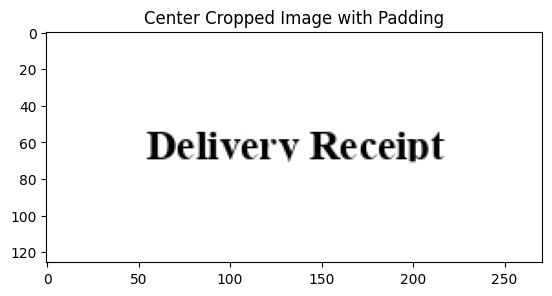

True

In [84]:
# bounding2.jpg 생성

confidences = conf
boxes = coord

# 특정 bounding box 선택 (예: 첫 번째 bounding box)
selected_box_index = 2
selected_box = coord[selected_box_index]

# bounding box 좌표 추출
x1, y1 = map(int, selected_box[0])
x2, y2 = map(int, selected_box[2])

# 이미지 크기 설정
height, width, _ = img.shape

# 흰 바탕화면 생성
white_background = np.ones((height, width, 3), dtype=np.uint8) * 255

# 특정 bounding box에 해당하는 이미지 추출
highlighted_box = img[max(y1, 0):min(y2, height), max(x1, 0):min(x2, width), :]

# 추출한 이미지를 흰 바탕화면 가운데에 삽입
offset_x = (width - (x2 - x1)) // 2
offset_y = (height - (y2 - y1)) // 2
white_background[offset_y:offset_y + (y2 - y1), offset_x:offset_x + (x2 - x1), :] = highlighted_box

# 추출한 이미지에서 가운데 부분만 가져오기
center_cropped = white_background[offset_y:offset_y + (y2 - y1), offset_x:offset_x + (x2 - x1), :]

# 여백 추가
padding = 50
center_cropped_with_padding = np.ones((center_cropped.shape[0] + 2 * padding, center_cropped.shape[1] + 2 * padding, 3), dtype=np.uint8) * 255
center_cropped_with_padding[padding:padding + center_cropped.shape[0], padding:padding + center_cropped.shape[1], :] = center_cropped

# 결과 이미지 출력
plt.imshow(center_cropped_with_padding[:, :, ::-1])
plt.title('Center Cropped Image with Padding')
plt.show()

# 결과 이미지 저장
cv2.imwrite('./output/RISE/bounding2.jpg', center_cropped_with_padding)

0.9719905
0.9718003
0.9671793
0.94214135
0.9512939
0.91492856
0.9604308


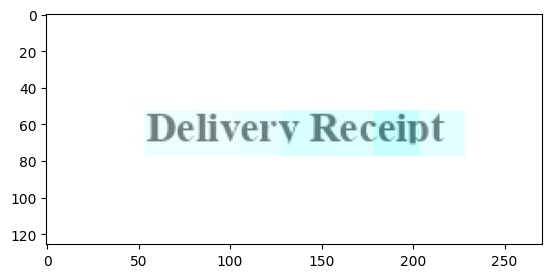

In [85]:
# 이미지 불러오기
image_path = 'bounding2.jpg'
jpg = cv2.imread("./output/RISE/"+image_path)

# 원래 image로부터 coordinate값 계산
coord = cal_coord(image_path)[0]

# 원래 image로부터 confidence 값을 계산합니다.
conf = cal_conf("RISE/"+image_path)[0]

# Convert coordinates to integers
coord = [(int(coor[0]), int(coor[1])) for coor in coord]

# In your apply_sequential_mask function
def apply_sequential_mask(image, window_size, coords):
    h, w, _ = image.shape

    # heatmap 기본값. 기본 이미지에 대한 conf score * 255. score 높으면 밝게
    heatmap_values = np.full_like(image, 255, dtype=np.uint8)

    # 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑기
    visited_pixels = set()
    for x in range(coords[0][1], coords[2][1], window_size):
        for y in range(coords[0][0], coords[2][0], window_size):
            # Extract n*n region without overlap
            selected_pixels = [(i, j) for i in range(x, min(x + window_size, h)) for j in range(y, min(y + window_size, w))]
            # Filter out already selected pixels
            selected_pixels = list(set(selected_pixels) - visited_pixels)

            if not selected_pixels:
                # Break if no more pixels to select
                break

            mask = np.zeros((h, w), dtype=bool)
            masked_image = image.copy()

            # 무작위로 선택된 픽셀에 마스크 적용
            for i, j in selected_pixels:
                mask[i, j] = True
                masked_image[i, j] = 255  # 마스크가 적용된 위치를 흰색으로 설정
            cv2.imwrite('./output/masked_image.jpg', masked_image)

            # 마스크가 적용된 이미지에서 confidence 값을 계산
            conf = cal_conf("masked_image.jpg")[0]

            if result == [None]:
                masked_confidence = 0
            else:
                masked_confidence = conf

            for i, j in selected_pixels:
                masked_confidence = float(masked_confidence)
                heatmap_values[i, j] = int(masked_confidence * 255)
            print(masked_confidence)

            # Update visited pixels
            visited_pixels.update(selected_pixels)

    # Convert heatmap_values to grayscale
    heatmap_gray = cv2.cvtColor(heatmap_values, cv2.COLOR_BGR2GRAY)

    # Create a colormap for the heatmap
    colormap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)

    # Adjust transparency of the heatmap (you can adjust the alpha value)
    alpha = 0.5
    heatmap_with_alpha = cv2.addWeighted(jpg, 1 - alpha, colormap, alpha, 0)

    # Display the result
    plt.imshow(heatmap_with_alpha)
    plt.show()

# 3) 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑음
apply_sequential_mask(jpg, window_size=25, coords=coord)


0.9719905
0.9718003
0.9671793
0.94214135
0.9512939
0.91492856
0.9604308


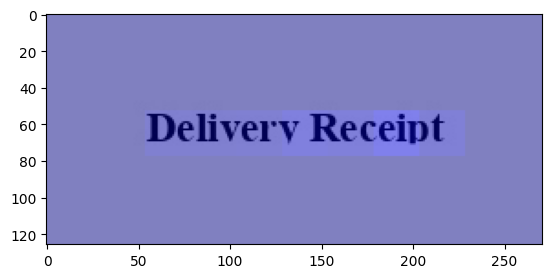

In [86]:
# 이미지 불러오기
image_path = 'bounding2.jpg'
jpg = cv2.imread("./output/RISE/"+image_path)

# 원래 image로부터 coordinate값 계산
coord = cal_coord(image_path)[0]

# 원래 image로부터 confidence 값을 계산합니다.
conf = cal_conf("RISE/"+image_path)[0]

# Convert coordinates to integers
coord = [(int(coor[0]), int(coor[1])) for coor in coord]

# In your apply_sequential_mask function
def apply_sequential_mask(image, window_size, coords):
    h, w, _ = image.shape

    # heatmap 기본값. 기본 이미지에 대한 conf score * 255. score 높으면 밝게
    heatmap_values = np.full_like(image, 255, dtype=np.uint8)

    # 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑기
    visited_pixels = set()
    for x in range(coords[0][1], coords[2][1], window_size):
        for y in range(coords[0][0], coords[2][0], window_size):
            # Extract n*n region without overlap
            selected_pixels = [(i, j) for i in range(x, min(x + window_size, h)) for j in range(y, min(y + window_size, w))]
            # Filter out already selected pixels
            selected_pixels = list(set(selected_pixels) - visited_pixels)

            if not selected_pixels:
                # Break if no more pixels to select
                break

            mask = np.zeros((h, w), dtype=bool)
            masked_image = image.copy()

            # 무작위로 선택된 픽셀에 마스크 적용
            for i, j in selected_pixels:
                mask[i, j] = True
                masked_image[i, j] = 255  # 마스크가 적용된 위치를 흰색으로 설정
            cv2.imwrite('./output/masked_image.jpg', masked_image)

            # 마스크가 적용된 이미지에서 confidence 값을 계산
            conf = cal_conf("masked_image.jpg")[0]

            if result == [None]:
                masked_confidence = 0
            else:
                masked_confidence = conf

            for i, j in selected_pixels:
                masked_confidence = float(masked_confidence)
                heatmap_values[i, j] = int(masked_confidence * 255)
            print(masked_confidence)

            # Update visited pixels
            visited_pixels.update(selected_pixels)

    # Convert heatmap_values to grayscale
    heatmap_gray = cv2.cvtColor(heatmap_values, cv2.COLOR_BGR2GRAY)

    # Create a colormap for the heatmap
    colormap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_JET)

    # Adjust transparency of the heatmap (you can adjust the alpha value)
    alpha = 0.5
    heatmap_with_alpha = cv2.addWeighted(jpg, 1 - alpha, colormap, alpha, 0)

    # Display the result
    plt.imshow(heatmap_with_alpha)
    plt.show()

# 3) 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑음
apply_sequential_mask(jpg, window_size=25, coords=coord)


0.9719905
0.9718003
0.9671793
0.94214135
0.9512939
0.91492856
0.9604308


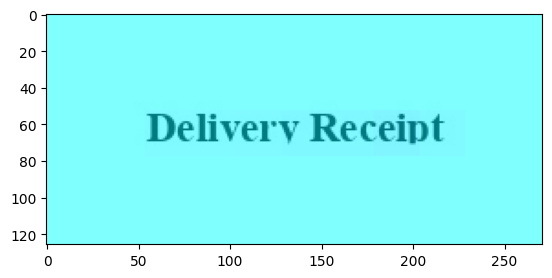

In [87]:
# 이미지 불러오기
image_path = 'bounding2.jpg'
jpg = cv2.imread("./output/RISE/"+image_path)

# 원래 image로부터 coordinate값 계산
coord = cal_coord(image_path)[0]

# 원래 image로부터 confidence 값을 계산합니다.
conf = cal_conf("RISE/"+image_path)[0]

# Convert coordinates to integers
coord = [(int(coor[0]), int(coor[1])) for coor in coord]

# In your apply_sequential_mask function
def apply_sequential_mask(image, window_size, coords):
    h, w, _ = image.shape

    # heatmap 기본값. 기본 이미지에 대한 conf score * 255. score 높으면 밝게
    heatmap_values = np.full_like(image, 255, dtype=np.uint8)

    # 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑기
    visited_pixels = set()
    for x in range(coords[0][1], coords[2][1], window_size):
        for y in range(coords[0][0], coords[2][0], window_size):
            # Extract n*n region without overlap
            selected_pixels = [(i, j) for i in range(x, min(x + window_size, h)) for j in range(y, min(y + window_size, w))]
            # Filter out already selected pixels
            selected_pixels = list(set(selected_pixels) - visited_pixels)

            if not selected_pixels:
                # Break if no more pixels to select
                break

            mask = np.zeros((h, w), dtype=bool)
            masked_image = image.copy()

            # 무작위로 선택된 픽셀에 마스크 적용
            for i, j in selected_pixels:
                mask[i, j] = True
                masked_image[i, j] = 255  # 마스크가 적용된 위치를 흰색으로 설정
            cv2.imwrite('./output/masked_image.jpg', masked_image)

            # 마스크가 적용된 이미지에서 confidence 값을 계산
            conf = cal_conf("masked_image.jpg")[0]

            if result == [None]:
                masked_confidence = 0
            else:
                masked_confidence = conf

            for i, j in selected_pixels:
                masked_confidence = float(masked_confidence)
                heatmap_values[i, j] = int(masked_confidence * 255)
            print(masked_confidence)

            # Update visited pixels
            visited_pixels.update(selected_pixels)

    # Convert heatmap_values to grayscale
    heatmap_gray = cv2.cvtColor(heatmap_values, cv2.COLOR_BGR2GRAY)

    # Create a colormap for the heatmap
    colormap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_AUTUMN)

    # Adjust transparency of the heatmap (you can adjust the alpha value)
    alpha = 0.5
    heatmap_with_alpha = cv2.addWeighted(jpg, 1 - alpha, colormap, alpha, 0)

    # Display the result
    plt.imshow(heatmap_with_alpha)
    plt.show()

# 3) 좌상단부터 우하단으로 가는 방향으로 픽셀을 n*n 영역씩 순서대로 뽑음
apply_sequential_mask(jpg, window_size=25, coords=coord)
